In [92]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint, solve_ivp
from scipy.signal import find_peaks
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from matplotlib.patches import FancyArrowPatch

plt.rcParams.update({'font.size': 12})

---------------
# 2. LASER
---------------

In [5]:
# Sistem of differential equations

def f(t, y, p, r):
    F, A = y

    dFdt = F / p * (A-1)
    dAdt = r - p * A * (F+1)

    return [dFdt, dAdt]

## Fazni diagram

In [ ]:
# Time
t_initial = 0.
t_final = 6
num_points = 10000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

# Initial values
initial_F = 1.0
initial_A = 1.0
y0 = [initial_F, initial_A]

# Parameters
p = 0.5
rs = np.append(np.arange(0.05, 0.5, 0.05), np.arange(0.5, 5, 0.5)) # This way rs/p = 0.1, 0.2, ..., 0.9, 1, 2, ..., 8, 9

cmap1 = get_cmap('cool')
norm1 = Normalize(vmin=min(rs/p), vmax=1)
cmap2 = get_cmap('hot')
norm2 = Normalize(vmin=1, vmax=max(rs/p)+1)

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(2,2,1)
ax1.grid()
ax1.set_title('Populacija fotonov')
ax1.set_xlabel('t')
ax1.set_ylabel('F')

ax2 = fig.add_subplot(2,2,2)
ax2.grid()
ax2.set_title('Populacija atomov')
ax2.set_xlabel('t')
ax2.set_ylabel('A')

ax3 = fig.add_subplot(2,2,(3,4))
ax3.grid()
ax3.set_title('Fazni diagram')
ax3.set_xlabel('A')
ax3.set_ylabel('F')

for r in rs:
    
    solution = solve_ivp(f, t_span, y0, args=(p,r), t_eval=ts, method='DOP853')
    F, A = solution.y
    
    if r/p <= 1.:
        color = cmap1(norm1(r/p))
    else:
        color = cmap2(norm2(r/p))

    ax1.plot(ts, F, color=color)
    ax2.plot(ts, A, color=color)
    ax3.plot(A, F, color=color)

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])
cbar = plt.colorbar(sm2, ax=[ax1, ax2, ax3], label=r'$r/p$')

sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm1)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=[ax1, ax2, ax3])

In [ ]:
# Time
t_initial = 0.
t_final = 6
num_points = 10000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

# Initial values
initial_Fs = np.arange(1., 4.25, 0.25)
initial_As = np.arange(1., 4.25, 0.25)

cmap = get_cmap('Spectral')
norm = Normalize(vmin=min(initial_As), vmax=max(initial_As))

# Parameters
p = 0.5
r = 2.5

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(2,1,1)
ax1.grid()
ax1.set_title(r'Fazni diagram $(A(0), F(0)=1)$')
ax1.set_ylabel('F')

ax2 = fig.add_subplot(2,1,2)
ax2.grid()
ax2.set_title(r'Fazni diagram $(A(0)=1, F(0))$')
ax2.set_xlabel('A')
ax2.set_ylabel('F')

for initial_A in initial_As:
    
    y0 = [1., initial_A]
    solution = solve_ivp(f, t_span, y0, args=(p,r), t_eval=ts, method='DOP853')
    F, A = solution.y

    color = cmap(norm(initial_A))
    ax1.plot(A, F, color=color)

for initial_F in initial_Fs:

    y0 = [initial_F, 1.]
    solution = solve_ivp(f, t_span, y0, args=(p,r), t_eval=ts, method='DOP853')
    F, A = solution.y

    color = cmap(norm(initial_F))
    ax2.plot(A, F, color=color)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=[ax1, ax2], label=r'$A(0), F(0)$')

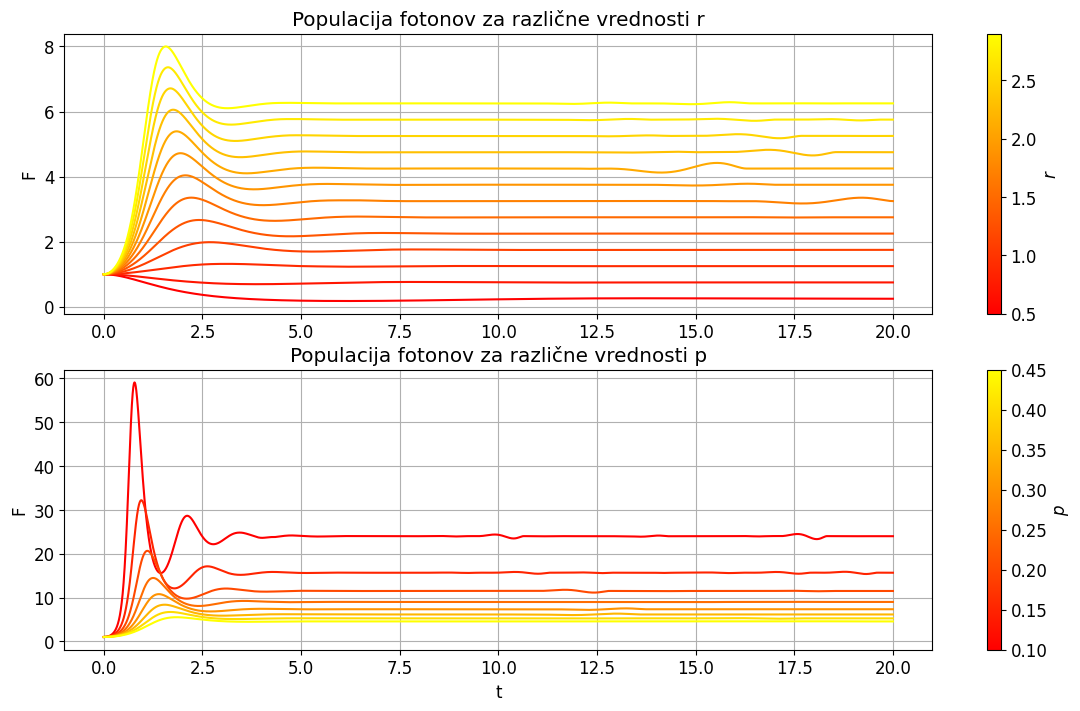

In [111]:
# Time
t_initial = 0.
t_final = 20
num_points = 10000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

# Initial values
initial_F = 1.0
initial_A = 1.0
y0 = [initial_F, initial_A]

# Parameters
P = 0.4
ps = np.arange(0.1, 0.5, 0.05)
R = 2.5
rs = np.arange(0.5, 3.1, 0.2)

cmap1 = get_cmap('autumn')
norm1 = Normalize(vmin=min(rs), vmax=max(rs))
cmap2 = get_cmap('autumn')
norm2 = Normalize(vmin=min(ps), vmax=max(ps))

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(2,1,1)
ax1.grid()
ax1.set_title('Populacija fotonov za različne vrednosti r')
ax1.set_ylabel('F')

ax2 = fig.add_subplot(2,1,2)
ax2.grid()
ax2.set_title('Populacija fotonov za različne vrednosti p')
ax2.set_xlabel('t')
ax2.set_ylabel('F')


for r in rs:
    
    solution = solve_ivp(f, t_span, y0, args=(P,r), t_eval=ts, method='DOP853')
    F, A = solution.y

    color = cmap2(norm1(r))
    ax1.plot(ts, F, color=color)


for p in ps:
    
    solution = solve_ivp(f, t_span, y0, args=(p,R), t_eval=ts, method='DOP853')
    F, A = solution.y
    
    color = cmap2(norm2(p))

    ax2.plot(ts, F, color=color)

sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm1)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=[ax1], label=r'$r$')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])
cbar = plt.colorbar(sm2, ax=[ax2], label=r'$p$')

c:\Users\Tadej\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\Tadej\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.24081632653061227 0.5
0.2469387755102041 0.5
0.2469387755102041 0.5122448979591837
0.25306122448979596 0.5
0.25306122448979596 0.5122448979591837
0.25306122448979596 0.5244897959183673
0.25918367346938775 0.5
0.25918367346938775 0.5122448979591837
0.25918367346938775 0.5244897959183673
0.25918367346938775 0.536734693877551
0.25918367346938775 0.5489795918367347
0.2653061224489796 0.5122448979591837
0.2653061224489796 0.5244897959183673
0.2653061224489796 0.536734693877551
0.2653061224489796 0.5489795918367347
0.2653061224489796 0.5612244897959183
0.27142857142857146 0.5122448979591837
0.27142857142857146 0.5244897959183673
0.27142857142857146 0.536734693877551
0.27142857142857146 0.5489795918367347
0.27142857142857146 0.5612244897959183
0.27142857142857146 0.573469387755102
0.27755102040816326 0.5244897959183673
0.27755102040816326 0.536734693877551
0.27755102040816326 0.5489795918367347
0.27755102040816326 0.5612244897959183
0.27755102040816326 0.573469387755102
0.27755102040816326 

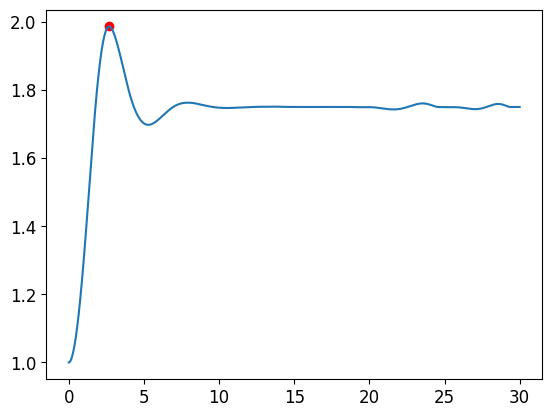

In [232]:
# Time
t_initial = 0.
t_final = 30
num_points = 20000
ts = np.linspace(t_initial, t_final, num_points)
t_span = (t_initial, t_final)  # Time span

# Initial values
initial_F = 1.0
initial_A = 1.0
y0 = [initial_F, initial_A]

# Parameters
ps = np.linspace(0.1, 0.4, 50)
rs = np.linspace(0.5, 1.1, 50)

taus = np.zeros((len(ps), len(rs)))
freq = np.zeros((len(ps), len(rs)))

P = 0.2
R = 1.8

for i, p in enumerate(ps):

    for j, r in enumerate(rs):

        solution = solve_ivp(f, t_span, y0, args=(p,r), t_eval=ts, method='DOP853')
        F, A = solution.y

        pks = np.append(find_peaks(F, height=1.05*np.median(F[-500:]))[0], find_peaks(-F, height=0.95*(np.median(-F[-500:])))[0])

        if len(pks) == 0:
            print(p,r)
            index = np.where((F > 0.95*np.median(F[-500:])) & (F < 1.05*np.median(F[-500:])))[0][0]
            taus[i][j] = ts[index]
            pks = np.append(find_peaks(F, height=1.001*np.median(F[-500:]))[0], find_peaks(-F, height=0.999*(np.median(-F[-500:])))[0])
            freq[i][j] =  1/ (2*np.average(ts[pks][:-1] - ts[pks][1:]))
        else:
            taus[i][j] = ts[pks[-1]]
            freq[i][j] = 1/ (2*np.average(ts[pks][:-1] - ts[pks][1:]))


plt.plot(ts, F)
plt.scatter(ts[pks], F[pks], color='red')

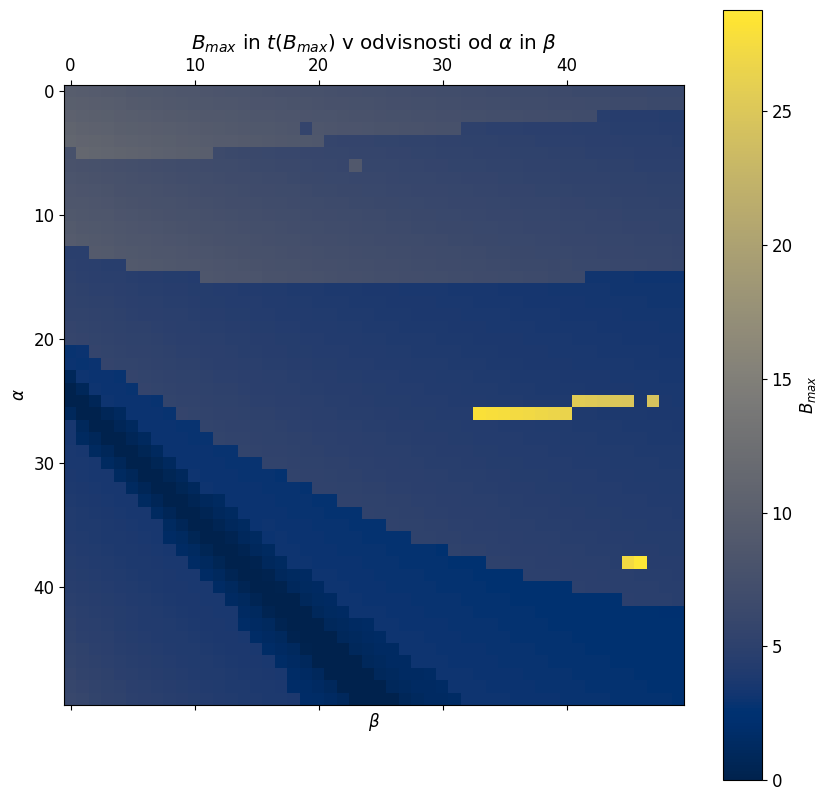

In [233]:
# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(10,10))

# Create the heatmap of Bmax1
cax = ax.matshow(taus, cmap='cividis')

# Set labels for the x and y axes

# Label the axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Add a colorbar
cbar = fig.colorbar(cax, label=r'$B_{max}$')

# Set the title
plt.title(r'$B_{max}$ in $t(B_{max})$ v odvisnosti od $\alpha$ in $\beta$')

# Display the heatmap
plt.show()


In [203]:
import numpy as np

arr = np.array([1, 3, 5, 7, 9, 11])  # Replace this with your array

result = arr[:-1] - arr[1:]
print(result)

[-2 -2 -2 -2 -2]
